## 1. Exploratory data analysis

In this initial analysis, we load the dataset and perform a preliminary investigation to understand its structure and characteristics.

The goal of exploratory data analysis is to get an overall view of the dataset, identify patterns, detect possible inconsistencies or outliers, check for missing values, and understand the distribution of variables. This step is essential for guiding decisions on data preprocessing, model selection, and analytical approaches in the subsequent stages.

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
datasetPath = '../../data/drinks.csv'
df = pd.read_csv(datasetPath)   

The `shape` attribute of a DataFrame returns the number of rows and columns in the dataset.

In [40]:
dataset_lines, dataset_columns = df.shape
print("The dataset has {} lines and {} columns.".format(dataset_lines, dataset_columns))

The dataset has 193 lines and 5 columns.


The `head()` method returns, by default, the first five rows of a DataFrame.

This initial preview is useful for quickly understanding the structure of the data, including column names, data types, and the overall format of the dataset. It also helps with the early detection of potential issues, such as missing values, irrelevant columns, or inconsistent data.

In [41]:
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


Here, we check whether there is only one record for each country.

In [42]:
print(f"'country' column has {df['country'].nunique()} unique values.")

'country' column has 193 unique values.


The `dtypes` attribute displays the data type of each column in the DataFrame, such as `int64`, `float64`, or `object` (commonly used for strings), among others.

This information is essential to understand how the data is represented internally and to ensure that each column has the appropriate type for future analyses, such as numerical computations, groupings, or data transformations.

In [43]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

The `describe()` method provides a statistical summary of the numerical columns in the DataFrame.

It returns metrics such as count, mean, standard deviation, minimum and maximum values, and the quartiles (25%, 50%, 75%), offering an overview of the data distribution. This information is useful for identifying trends, variability, and potential outliers in the numerical variables.

In [44]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


The instruction `df.isna().sum()` checks for missing (NaN) values in each column of the DataFrame.

It returns the count of null values per column, helping to identify variables that may require handling, such as filling, removal, or replacement. This analysis is crucial to ensure data quality before moving on to more advanced steps.

In [45]:
df.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

The correlation matrix is a structure that shows the strength of the relationship between numerical variables in the dataset, using correlation coefficients (typically Pearson's).

Values range from -1 to 1:

* 1 indicates a perfect positive correlation (both variables increase together),
* -1 indicates a perfect negative correlation (one increases while the other decreases),
* 0 indicates no linear correlation.

This matrix is useful for identifying strongly related variables, which can guide feature selection decisions or reveal redundancy in the data.

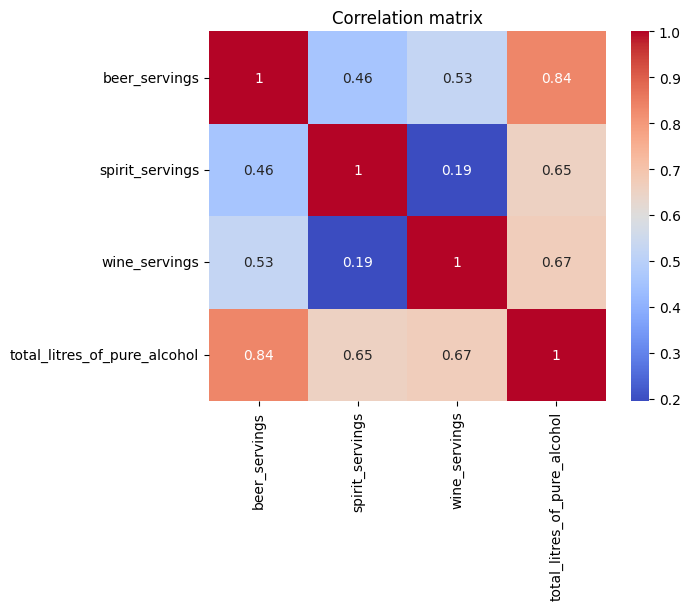

In [46]:
df_correlation = df.corr(numeric_only=True)

sns.heatmap(df_correlation, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()